# question 1  California Housing

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
#create a df with pandas
california_data = fetch_california_housing()
california_df = pd.DataFrame(data=california_data.data,columns=california_data.feature_names)
california_df['MedHouseVal'] = california_data.target
#check the df info and range of values
california_df.to_csv('california_df.csv',index=False)
california_df.info()
california_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


بعضی ستون ها داده های عجیبی دارن مثلا ماکسیم تعداد اتاق برابر 141 اتاق بوده و این عدد اصلا منطقی به نظر نمیاد حتی تو یه هتل هم شاید این تعداد اتاق نباشه 

به نظرم اینا انومالی هستن یا خونه های عجیبی هستن که مثلا مال ثروتمندا بوده یا هتل بوده یا نمی دونم شاید انومالی بوده و اصلا اشتباه وارد شده 

قیمت خانه ها هم نرمال سازی شده مثلا هر عدد نشانه 100 دلاره ینی 5 مساوی 500 هزار دلاره 

ستون درامدم که ده هزار دلار هر  واحدش ینی 3 برابر با 30 هزار دلار اینکام 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,3.609323,-2.846140,1.536568,-0.055858,1.040098e+01,0.370289,-0.323860,-0.057765,1.508475
HouseAge,-2.846140,158.396260,-4.772882,-0.463718,-4.222271e+03,1.724298,0.300346,-2.728244,1.533988
AveRooms,1.536568,-4.772882,6.121533,0.993868,-2.023337e+02,-0.124689,0.562235,-0.136518,0.433826
AveBedrms,-0.055858,-0.463718,0.993868,0.224592,-3.552723e+01,-0.030424,0.070575,0.012670,-0.025539
Population,10.400979,-4222.270582,-202.333712,-35.527225,1.282470e+06,821.712002,-263.137814,226.377839,-32.212487
AveOccup,0.370289,1.724298,-0.124689,-0.030424,8.217120e+02,107.870026,0.052492,0.051519,-0.284494
Latitude,-0.323860,0.300346,0.562235,0.070575,-2.631378e+02,0.052492,4.562293,-3.957054,-0.355326
Longitude,-0.057765,-2.728244,-0.136518,0.012670,2.263778e+02,0.051519,-3.957054,4.014139,-0.106274
MedHouseVal,1.508475,1.533988,0.433826,-0.025539,-3.221249e+01,-0.284494,-0.355326,-0.106274,1.331615


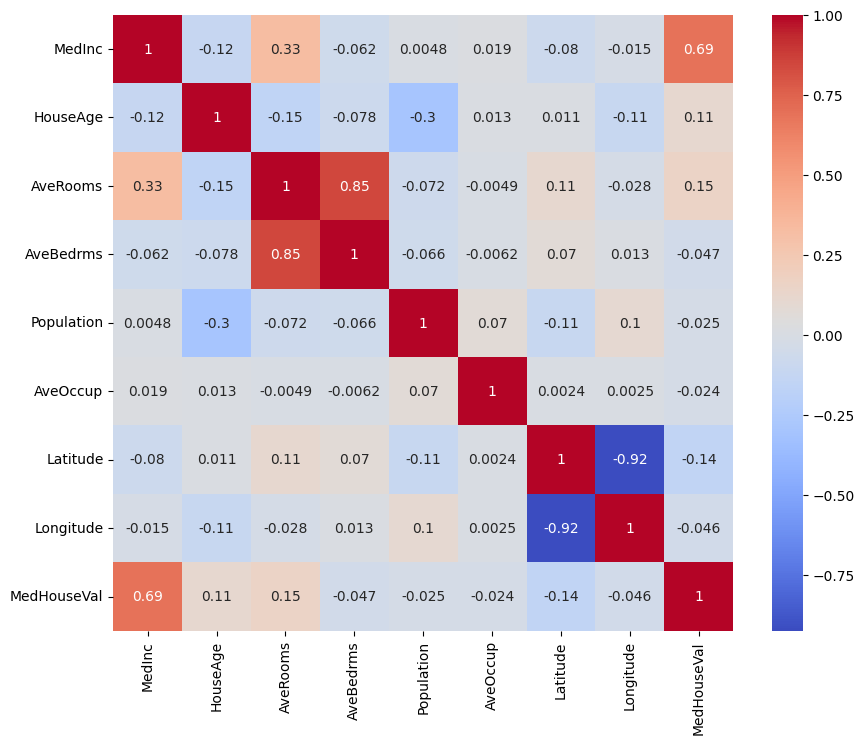

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
#correlation matrix
plt.figure(figsize=(10,8))
correlation_matrix = california_df.corr()
sns.heatmap(correlation_matrix,cmap="coolwarm",annot=True)
#covariance matrix
covariance_matrix = california_df.cov()
covariance_matrix

In [3]:
# covariance 3 smallest pair and largest pair
pairs = []
for i in range(len(covariance_matrix)):
    for j in range(i+1,len(covariance_matrix)):
        pairs.append((covariance_matrix.index[i],covariance_matrix.index[j],covariance_matrix.iloc[i,j]))
pairs_df = pd.DataFrame(pairs,columns=['feature1','feature2','covariance'])
smallest_pair = pairs_df.nsmallest(3,'covariance')
largest_pair = pairs_df.nlargest(3,'covariance')
# correlation 3 smallest pair and largest pair
correlation_pairs = []
for i in range(len(correlation_matrix)):
    for j in range(i+1,len(correlation_matrix)):
        correlation_pairs.append((correlation_matrix.index[i],correlation_matrix.index[j],correlation_matrix.iloc[i,j]))
correlation_pairs_df = pd.DataFrame(correlation_pairs,columns=['feature1','feature2','correlation'])
smallest_correlation_pair = correlation_pairs_df.nsmallest(3,'correlation')
largest_correlation_pair = correlation_pairs_df.nlargest(3,'correlation')
# input features with smallest and largest covariance and correlation
print(f"smallest covariance pair: \n{smallest_pair}\n")
print(f"smallest correlation pair: \n{smallest_correlation_pair}\n")

print(f"largest covariance pair: \n{largest_pair}\n")
print(f"largest correlation pair: \n{largest_correlation_pair}\n")

smallest covariance pair: 
      feature1    feature2   covariance
10    HouseAge  Population -4222.270582
27  Population    Latitude  -263.137814
16    AveRooms  Population  -202.333712

smallest correlation pair: 
    feature1    feature2  correlation
33  Latitude   Longitude    -0.924664
10  HouseAge  Population    -0.296244
8   HouseAge    AveRooms    -0.153277

largest covariance pair: 
      feature1    feature2  covariance
26  Population    AveOccup  821.712002
28  Population   Longitude  226.377839
3       MedInc  Population   10.400979

largest correlation pair: 
    feature1     feature2  correlation
15  AveRooms    AveBedrms     0.847621
7     MedInc  MedHouseVal     0.688075
1     MedInc     AveRooms     0.326895



کوچیک ترین جفت های کواریانس:
سن خونه و جمعیت  با هم رابطه منفی دارن این داره میگه که قدیمی بودن بلوک احتمال باعث میشه افراد کمتری اونجا زندگی کنن 
؛عرض جغرافیایی با جمعیت رابطه منفی داره و میتونه معنیش این باشه افراد با تغییر عرض جغرافیایی(احتمال به معنای حاشیه نشینی ) جمعیتشون کاهش داشته 
؛تعداد اتاق هم با جمعیت رابطه منفی داشته که خب معنای اینه که خب این احتمالا از اینجا میاد که خونه های ویلایی که برای ثروتمند هاست معمولا اتاق خواب زیادی داره و محله های دنج و خلوتی به حساب میان 

مقایسه جفت های کورلیشن : مورد اول بین طول و عرض جغرافیایی و همبستگی منفی وجود داره ولی چیز بی ربطیه چون طول جغرافیایی کالیفرنیا منفی بین -114 تا -124 این اتفاق افتاد ؛
سن خانه همون تور که تو مورد قبلی هم دیده شد رابطه منفی ضعیفی با جمعیت داره 
سن خانه با تعداد اتاق هم بی ربط به نظر میاد چون به شدت به صفر نزدیک 
اما به علت نرمال سازی بخش قابل توجهی از جفت هایی که تو ماتریس کوواریانس دیدیم اینجا نیستن پس احتمال علت وجودشون تو کوواریانس تفاوت رنج داده دو فیچر بوده 

کوواریانس مثبت : مورد اول بین جمعیت فرد در خانه و جمعیت کلی بلوک بوده که خب منطقی محله ای که ادم  هایی بیشتری تو خونش داشته پس طبیعتا جمعیت بیشتری هم داشته البته باید تاثیر تفاوت اسکیل جمعیت با افراد ساکن در هر خانه هم در نظر گرفت ؛
مورد بعدی طول جغرافیایی که یه عدد منفی از -114 تا -124 که احتمالا بیشتر ادم ها تو طول جغرافیایی نزدیک -114 بودن که داده های متد دیسکرایب هم این رو تاییید میکنه  اکثریت تو طول جغرافیایی -119 بودن ؛
درآمد همبستگی مثبتی با جمعیت داشته ظاهرا و مناطق پر جمعیت در آمد بیشتری داشتن اما همچنان تاثیر اسکیل متفاوت ستون پاپیولیشن باعث میشه میزان همبستگی قابل تشخیص نباشه

کورلیشن مثبت: خب اینجا داده ها استاندارد شدن و این خیلی خوبه چون همبستگی که قابل درک تر شدن و فارق از اسکیل ، اینجا اولین جفت به شدت همبسته میانگین تعداد اتاق و اتاق خواب بوده که نشون میده این دو جفت با هم کاهش و افزایش داشتن ؛در امد با قیمت خانه ها رابطه مثبت داره که نشون دهنده اینه جاهایی که گرون تر هستن طبیعتا افراد با درآمد بالاتر ساکن شدن و این یه مزیت چون معمولا مناطق ثروتمند نشین وضعیت امنیت و فرهنگ بهتری دارن ؛ درآمد با میانگین اتاق هم ارتباط داشته که همبستگی خیلی زیادی نیست ولی نشون میده بلوک هایی که افراد در آمد بهتری داشتن اتاق های بیشتری هم داشتن 

# کوواریانس بهتره یا کورلیشن و تاثیر اسکیل بر روی هر کدوم 
به نظر بنده کوواریانس معیاری است که با وجود اینکه میتواند مثبت یا منفی بودن همبستگی را نشان دهد نمیتواند تاثیر اسکیل را نا دیده بگیرد اگر بخوام مثال بزنم مثلا جمعیت و عمر خانه اسکیل واقعا متفاوتی دارن و این باعث این مسئله شده که کوواریانس منفی بین این دو فیچر ایجاد بشه در حالی که نباید به خاطر اسکیل این اتفاق میوفتاده 

حالا اگر فیچری را در یک ثابت ضرب کنیم بعث میشود اسکیل ها تغییر کند و کوواریانس که وابسته به ان است به شدت دچار تغییر شود ولی کورلیشن اصلا دچار این مشکل نمی شود چون با نرمال کردن داده ها تاثیر اسکیل را از بین میبرد و  فقط بررسی میکند که چه مقدار و چه نوع همبستگی وجود دارد 

# نتیجه :
من به شخصه ترجیح میدهم  به جای گمراه شدن توسط اسکیل از کورلیشن استفاده کنم تا با ارتباط واقعی بین فیچر ها روبرو شوم 

# question 2 Breast Cancer

In [4]:
# create a df with pandas 
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
breast_cancer_data = load_breast_cancer()
breast_cancer_df = pd.DataFrame(data=breast_cancer_data.data,columns=breast_cancer_data.feature_names)
#add target labels
breast_cancer_df['target'] = breast_cancer_data.target
breast_cancer_df['target']= breast_cancer_df['target'].map({0:"benign",1:"malignant"})
#check the df info and range of values
breast_cancer_df.to_csv('breast_cancer_df.csv',index=False)
breast_cancer_df.info()
breast_cancer_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
# choose samples from df
benign_samples = breast_cancer_df[breast_cancer_df['target'] == 'benign'].sample(3,random_state=42)
malignant_samples = breast_cancer_df[breast_cancer_df['target'] == 'malignant'].sample(3,random_state=42)
# main df covariance matrix
covariance_matrix = breast_cancer_df.cov(numeric_only=True).values
VI = np.linalg.inv(covariance_matrix)
# distance functions
def euclidean_distance(x_point,y_point):
    return np.sqrt(np.sum((x_point-y_point)**2))
def manhattan_distance(x_point,y_point):
    return np.sum(np.abs(x_point-y_point))
def chebyshev_distance(x_point,y_point):
    return np.max(np.abs(x_point-y_point))
def cosine_similarity(x_point,y_point):
    dot_product = np.dot(x_point, y_point)
    norm_x = np.linalg.norm(x_point)
    norm_y = np.linalg.norm(y_point)
    return 1 - dot_product / (norm_x * norm_y)
#mahalan distance
def mahalanobis_distance(x_point, y_point, VI):
    diff = x_point - y_point
    return np.sqrt(np.dot(np.dot(diff, VI), diff.T))
# calculate distances
euclidean=[]
manhattan=[]
chebyshev=[]
cosine=[]
mahalanobis=[]
for i in range(len(benign_samples)):
    euclidean.append(euclidean_distance(benign_samples.iloc[i,:-1],malignant_samples.iloc[i,:-1]) )
    manhattan.append(manhattan_distance(benign_samples.iloc[i,:-1],malignant_samples.iloc[i,:-1]) )
    chebyshev.append(chebyshev_distance(benign_samples.iloc[i,:-1],malignant_samples.iloc[i,:-1]))
    cosine.append(cosine_similarity(benign_samples.iloc[i,:-1],malignant_samples.iloc[i,:-1]) )
    mahalanobis.append(mahalanobis_distance(benign_samples.iloc[i,:-1],malignant_samples.iloc[i,:-1],VI) )

# create distance df
distance_df = pd.DataFrame({
    'euclidean':euclidean,
    'manhattan':manhattan,
    'chebyshev':chebyshev,
    'mahalanobis':mahalanobis,
    'cosine':cosine},
    index=range(1,4))
distance_df

,euclidean,manhattan,chebyshev,mahalanobis,cosine
1,1260.240251,1874.849886,1128.5,8.498320,0.013594
2,1176.338716,1830.677342,937.0,9.823604,0.004562
3,631.272815,983.674701,489.5,3.966023,0.000556


فاصله اقلیدسی : این فاصله فاصله مطلق دو نقطه رو شناسایی میکنه توی شناسایی نزدیک ترین همسایه و کلاسترینگ کاربرد داره ؛ ولی عیبش اینه که به مقیاس حساسه مثلا اگر نقطه ما از قد و زون تشکیل شده باشه چون معمولا اعداد قد اعداد بزرگی به حساب میاد باعث این ذهنیت میشه که دو نقطه فاصله خیلی زیادی دارن از این نظر یه جورایی شبیه به کوواریانس که به مقیاس حساسس بود و به راحتی نمی شد فهمید عدد همبستگی که نشون میده زیاده یا به خاطر مقیاس بزرگ شده 
حالا راهکاری که وجود داره اینه که داده ها استاندارد بشن مثلا با مثلا با زد اسکور به نظرم میشه داده های این سمپل ها رو استاندارد کرد بعد دوباره بررسی کرد فاصله ها چه تغییری داشتن   

فاصله منهتن : تفاوت این مسئله اینه که از قدر مطلق استفاده میکنه و ریشه گیری نمی کنه ، اینجا چون دیگه از فیثاغورس استفاده نمی کنیم داریم سهم هر محور حساب میکنیم انگار که تو خیابون ها شطرنجی حرکت کنی به جای خط مستقیم و این باعث میشه فاصله مستقیم بین دو نقطه رو نشون نمی ده ولی مزیتی که داره اختلاف تمام فیچر ها حتی فیچر های کوچیک تو خروجی تاثیر گزاره حتی همین جا هم عدد بزرگ تری از اختلاف نسبت به اقلیدسی نشون میده ؛ و حتی در ابعاد بالاتر ممکنه بهتر بتونه بین نقاط فاصله ها رو تشخیص بده در حالی که ممکنه اقلیدسی اکثر فاصله ها رو شبیه هم نشون بده در ابعاد زیاد ولی از طرفی چون به توان دو نمی رسونه اختلاف های خیلی پرت ممکنه به اندازه اقلیدسی بزرگ به چشم نیان ؛ همچنین در مسائلی که نیاز داریم فاصله مستقیم دو نقطه رو بدونیم اقلیدسی قطعا بهتره و در نهایت این شیوه محاسبه فاصله هم مثل اقلیدسی حساس به مقیاس هست  

فاصله چبی شو میاد اول فاصله بین هر محور دو نقطه رو مثل تمام روش های دیگه حساب میکنه بعدش میاد اون محوری که مقدار فاصله بیشتری رو نشون میداده ینی اختلاف بیشتری داشته انتخاب میکنه به عنوان فاصله نمایش میده مزیتش اینه که بیشترین اختلاف رو از بین فیچر ها انتخاب میکنه و محاسبه سادی تری به نسبت داره ولی بدیش اینه کلی اطلاعات رو نادیده میگیره و حساسیت شدیدی به اوت لیر هم داره اگر یه فیچر خیلی متفاوت باشه کل فاصله رو بر اساس همون در نظر میگیره 


کوسینوسی :در فاصله کسینوسی یا شباهت کوسینوسی ما نقطه رو به صورت  یه بردار که از صفر مبدا شروع شده تصور میکنیم و با ضرب داخلی نقاط و تقسیم اون بر فاصله بردار ها ضرب در هم و کم کردن این شباهت از 1 به عددی میرسیم که بین 1 تا -1 اگر یک باشه ینی دقیقا هم جهت هستن اگر صفر باشه ینی کاملا نا مرتبط هستن و نود درجه هستن و اگر -1 باشه دو بردار دقیقا مخالف هستن حالا ما بررسی میکنیم خروجی نزدیک به کدوم حالت هست .
تفسیر خروجیش سادس ، بی تفاوت به مقیاس هست و روی الگو و جهت تمرکز میکنه اما معایبی هم داره ؛ در مواردی که مقدار به طور مطلق برامون اهمیت داره خیلی بده 
حالا درمورد سرطان : اگر بخوای ببینی الگو و شباهت بردار  نقطه ها چه شکلی بوده خوبه ولی اگر بخوای چیزی مثل اندازه هسته رو مقایسه کنی نمی تونی متوجه بشی که ایا صرفا هم جهت هستن یا فاصلشون هم با هم کمه ؟

In [6]:
# malignant or benign?
malignant_df = breast_cancer_df[breast_cancer_df['target'] == 'malignant']
benign_df = breast_cancer_df[breast_cancer_df['target'] == 'benign']
malignant_mean = malignant_df.mean(numeric_only=True)
benign_mean = benign_df.mean(numeric_only=True)
# distance functions
mean_euclidean_distance =euclidean_distance(malignant_mean,benign_mean)
mean_manhattan_distance =manhattan_distance(malignant_mean,benign_mean)
mean_chebyshev_distance =chebyshev_distance(malignant_mean,benign_mean)
mean_cosine_similarity =cosine_similarity(malignant_mean,benign_mean)
mean_mahalanobis_distance =mahalanobis_distance(malignant_mean,benign_mean,VI)
# create distance df
mean_distance_df = pd.DataFrame({
    'euclidean':mean_euclidean_distance,
    'manhattan':mean_manhattan_distance,
    'chebyshev':mean_chebyshev_distance,
    'mahalanobis':mean_mahalanobis_distance,
    'cosine':mean_cosine_similarity
},index=[1])
mean_distance_df


,euclidean,manhattan,chebyshev,mahalanobis,cosine
1,1009.162787,1548.36115,863.386881,1.818402,0.005684


In [7]:
# train data
train_data = breast_cancer_df.iloc[:500,:].copy()
# malignant df covariance
'''malignant_df_cov= malignant_df.cov(numeric_only=True)
malignant_vi= np.linalg.inv(malignant_df_cov)'''
# distance's lists
train_euclidean=[]
train_manhattan=[]
train_chebyshev=[]
train_cosine=[]
train_mahalanobis=[]
# calculate distances loop
for i in range(len(train_data)):
    train_euclidean.append(euclidean_distance(train_data.iloc[i,:-1],malignant_mean))
    train_manhattan.append(manhattan_distance(train_data.iloc[i,:-1],malignant_mean))
    train_chebyshev.append(chebyshev_distance(train_data.iloc[i,:-1],malignant_mean))
    train_cosine.append(cosine_similarity(train_data.iloc[i,:-1],malignant_mean))
    train_mahalanobis.append(mahalanobis_distance(train_data.iloc[i,:-1],malignant_mean,VI))
# add new columns
train_data['euclidean']  = train_euclidean
train_data['manhattan']  = train_manhattan
train_data['chebyshev']  = train_chebyshev
train_data['mahalanobis']  = train_mahalanobis
train_data['cosine']  = train_cosine
train_data



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,euclidean,manhattan,chebyshev,mahalanobis,cosine
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,0.7119,0.2654,0.4601,0.11890,benign,1565.535180,2314.414719,1460.100560,9.749201,0.029433
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,0.2416,0.1860,0.2750,0.08902,benign,1645.658678,2462.643046,1397.100560,6.187839,0.007573
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,0.4504,0.2430,0.3613,0.08758,benign,1372.269789,2108.432187,1150.100560,5.141610,0.005531
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,0.6869,0.2575,0.6638,0.17300,benign,78.473068,116.119690,76.690196,10.735700,0.004682
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,0.4000,0.1625,0.2364,0.07678,benign,1319.645486,2078.654007,1016.100560,5.359333,0.002450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,14.87,20.21,96.12,680.9,0.09587,0.08345,0.06824,0.04951,0.1487,0.05748,...,0.1700,0.1017,0.2369,0.06599,malignant,314.194749,492.166858,224.700560,3.099506,0.000634
496,12.65,18.17,82.69,485.6,0.10760,0.13340,0.08017,0.05074,0.1641,0.06854,...,0.3582,0.1407,0.3230,0.10330,malignant,78.844947,118.028330,74.800560,3.628515,0.000732
497,12.47,17.31,80.45,480.1,0.08928,0.07630,0.03609,0.02369,0.1526,0.06046,...,0.2028,0.1053,0.3035,0.07661,malignant,52.622999,87.125907,48.400560,2.930537,0.000352
498,18.49,17.52,121.30,1068.0,0.10120,0.13170,0.14910,0.09183,0.1832,0.06697,...,0.3533,0.1663,0.2510,0.09445,benign,1208.831154,1844.581642,1041.100560,4.787213,0.007654


In [8]:
# add diagnosis column
train_data['guess'] = 'none'
# diagnosis loop width mean distance df

for i in range(len(train_data)):
    # if score == 4 means malignant
    score = 0
    if train_data.iloc[i,31] < mean_distance_df.loc[1,'euclidean']:
        score += 1
    if train_data.iloc[i,32] < mean_distance_df.loc[1,'manhattan']:
        score += 1
    if train_data.iloc[i,33] < mean_distance_df.loc[1,'chebyshev']:
        score += 1
    if train_data.iloc[i,34] < mean_distance_df.loc[1,'mahalanobis']:
        score += 1
    if train_data.iloc[i,35] < mean_distance_df.loc[1,'cosine']:
        score += 1
    if score >= 4:
        train_data.loc[i,'guess'] = 'malignant'
    else:
        train_data.loc[i,'guess'] = 'benign'

correct_answer = 0
wrong_answer = 0
for i in range(len(train_data)):
    if train_data.loc[i,'guess'] == train_data.loc[i,'target']:
        correct_answer += 1
    else:
        wrong_answer += 1
print(f"correct_answer= {correct_answer}")
print(f"wrong_answer= {wrong_answer}")
print(f"precision= {correct_answer/(correct_answer+wrong_answer)*100}")

perecision_df = pd.DataFrame({
    'perecision of all distances':correct_answer/(correct_answer+wrong_answer)*100
    
},index=[1])

correct_answer= 420
wrong_answer= 80
precision= 84.0


In [9]:
# only euclidean distance
for i in range(len(train_data)):
    # if score == 4 means malignant
    score = 0
    if train_data.iloc[i,31] < mean_distance_df.loc[1,'euclidean']:
        score += 1

    if score == 1:
        train_data.loc[i,'guess'] = 'malignant'
    else:
        train_data.loc[i,'guess'] = 'benign'

correct_answer = 0
wrong_answer = 0
for i in range(len(train_data)):
    if train_data.loc[i,'guess'] == train_data.loc[i,'target']:
        correct_answer += 1
    else:
        wrong_answer += 1
print(f"correct_answer= {correct_answer}")
print(f"wrong_answer= {wrong_answer}")
print(f"precision= {correct_answer/(correct_answer+wrong_answer)*100}")
perecision_df['perecision of euclidean distance'] = correct_answer/(correct_answer+wrong_answer)*100


correct_answer= 391
wrong_answer= 109
precision= 78.2


In [10]:
# only manhattan distance
for i in range(len(train_data)):
    # if score == 4 means malignant
    score = 0

    if train_data.iloc[i,32] < mean_distance_df.loc[1,'manhattan']:
        score += 1
    if score == 1:
        train_data.loc[i,'guess'] = 'malignant'
    else:
        train_data.loc[i,'guess'] = 'benign'



correct_answer = 0
wrong_answer = 0
for i in range(len(train_data)):
    if train_data.loc[i,'guess'] == train_data.loc[i,'target']:
        correct_answer += 1
    else:
        wrong_answer += 1
print(f"correct_answer= {correct_answer}")
print(f"wrong_answer= {wrong_answer}")
print(f"precision= {correct_answer/(correct_answer+wrong_answer)*100}")
perecision_df['perecision of manhattan distance'] = correct_answer/(correct_answer+wrong_answer)*100

correct_answer= 392
wrong_answer= 108
precision= 78.4


In [11]:
# only chebyshev distance
for i in range(len(train_data)):
    # if score == 4 means malignant
    score = 0

    if train_data.iloc[i,33] < mean_distance_df.loc[1,'chebyshev']:
        score += 1
    if score == 1:
        train_data.loc[i,'guess'] = 'malignant'
    else:
        train_data.loc[i,'guess'] = 'benign'



correct_answer = 0
wrong_answer = 0
for i in range(len(train_data)):
    if train_data.loc[i,'guess'] == train_data.loc[i,'target']:
        correct_answer += 1
    else:
        wrong_answer += 1
print(f"correct_answer= {correct_answer}")
print(f"wrong_answer= {wrong_answer}")
print(f"precision= {correct_answer/(correct_answer+wrong_answer)*100}")
perecision_df['perecision of chebyshev distance'] = correct_answer/(correct_answer+wrong_answer)*100

correct_answer= 386
wrong_answer= 114
precision= 77.2


In [12]:
# only mahalanobis distance
for i in range(len(train_data)):
    # if score == 4 means malignant
    score = 0

    if train_data.iloc[i,34] < mean_distance_df.loc[1,'mahalanobis']:
        score += 1
    if score == 1:
        train_data.loc[i,'guess'] = 'malignant'
    else:
        train_data.loc[i,'guess'] = 'benign'



correct_answer = 0
wrong_answer = 0
for i in range(len(train_data)):
    if train_data.loc[i,'guess'] == train_data.loc[i,'target']:
        correct_answer += 1
    else:
        wrong_answer += 1
print(f"correct_answer= {correct_answer}")
print(f"wrong_answer= {wrong_answer}")
print(f"precision= {correct_answer/(correct_answer+wrong_answer)*100}")
perecision_df['perecision of mahalanobis distance'] = correct_answer/(correct_answer+wrong_answer)*100

correct_answer= 196
wrong_answer= 304
precision= 39.2


In [13]:
# only cosine distance
for i in range(len(train_data)):
    # if score == 4 means malignant
    score = 0

    if train_data.iloc[i,35] < mean_distance_df.loc[1,'cosine']:
        score += 1
    if score == 1:
        train_data.loc[i,'guess'] = 'malignant'
    else:
        train_data.loc[i,'guess'] = 'benign'



correct_answer = 0
wrong_answer = 0
for i in range(len(train_data)):
    if train_data.loc[i,'guess'] == train_data.loc[i,'target']:
        correct_answer += 1
    else:
        wrong_answer += 1
print(f"correct_answer= {correct_answer}")
print(f"wrong_answer= {wrong_answer}")
print(f"precision= {correct_answer/(correct_answer+wrong_answer)*100}")
perecision_df['perecision of cosine distance'] = correct_answer/(correct_answer+wrong_answer)*100

correct_answer= 389
wrong_answer= 111
precision= 77.8


In [14]:
perecision_df


,perecision of all distances,perecision of euclidean distance,perecision of manhattan distance,perecision of chebyshev distance,perecision of mahalanobis distance,perecision of cosine distance
1,84.0,78.2,78.4,77.2,39.2,77.8


اول از همه فاصله ها و با داشتن حداقل 4 امتیاز برای تشخیص استفاده کردم که بیشترین دقت ینی 84 درصد رو داشتم 
بعد از اقلیدسی به صورت تنها با 78 درصد دقت و ... استفاده کردم 
پایین ترین دقت رو فاصله ماهالانوبیس داشت با 39 درصد دقت 
پس برای کار روی داده های تست از هر پنج معیار استفاده خواهم کرد 

In [15]:
#calculating for test samples
test_samples = breast_cancer_df.iloc[500:,:].copy().reset_index(drop=True)
euclidean_list= []
manhattan_list= []
chebyshev_list= []
mahalanobis_list= []
cosine_similarity_list= []
for i in range(len(test_samples)):
    euclidean_list.append(euclidean_distance(test_samples.iloc[i,:-1],malignant_mean))
    manhattan_list.append( manhattan_distance(test_samples.iloc[i,:-1],malignant_mean))
    chebyshev_list.append( chebyshev_distance(test_samples.iloc[i,:-1],malignant_mean))
    mahalanobis_list.append( mahalanobis_distance(test_samples.iloc[i,:-1],malignant_mean,VI))
    cosine_similarity_list.append(cosine_similarity(test_samples.iloc[i,:-1],malignant_mean))

test_samples['euclidean'] = euclidean_list
test_samples['manhattan'] = manhattan_list  
test_samples['chebyshev'] = chebyshev_list  
test_samples['mahalanobis'] = mahalanobis_list
test_samples['cosine'] = cosine_similarity_list
# test sampels 
test_samples['guess'] = 'none'

for i in range(len(test_samples)):
    # if score == 4 means malignant
    score = 0

    if test_samples.iloc[i,31] < mean_distance_df.loc[1,'euclidean']:
        score += 1
    if test_samples.iloc[i,32] < mean_distance_df.loc[1,'manhattan']:
        score += 1
    if test_samples.iloc[i,33] < mean_distance_df.loc[1,'chebyshev']:
        score += 1
    if test_samples.iloc[i,34] < mean_distance_df.loc[1,'mahalanobis']:
        score += 1
    if test_samples.iloc[i,35] < mean_distance_df.loc[1,'cosine']:
        score += 1
    if score >= 4:
        test_samples.loc[i,'guess'] = 'malignant'
    else:
        test_samples.loc[i,'guess'] = 'benign'


correct_answer = 0
wrong_answer = 0
for i in range(len(test_samples)):
    if test_samples.iloc[i]['guess'] == test_samples.iloc[i]['target']:
        correct_answer += 1
    else:
        wrong_answer += 1
print(f"correct_answer= {correct_answer}")
print(f"wrong_answer= {wrong_answer}")
print(f"precision= {correct_answer/(correct_answer+wrong_answer)*100}")


correct_answer= 60
wrong_answer= 9
precision= 86.95652173913044


# question 3 PCA  

In [2]:
# import dataset diabites
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
# z score function
def z_score(x):
    return (x - np.mean(x)) / np.std(x,ddof=0)
#load dataset
diabetes = load_diabetes()  
#create dataframe
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df.to_csv('diabetes.csv')
#save target
target = diabetes.target

#call z_score
diabetes_df = z_score(diabetes_df)
#check result
print(f"std of each column: \n{diabetes_df.std(axis=0,ddof=0)}")
print(f"mean of each column: \n{diabetes_df.mean(axis=0).round(2)}")

# import PCA from sklearn
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(diabetes_df)
# explained_variance_ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)
# create a df with explained_variance_ratio and cumulative_explained_variance_ratio
pca_df = pd.DataFrame({
    'explained_variance_ratio':explained_variance_ratio,
    'cumulative_explained_variance_ratio':cumulative_explained_variance_ratio
    })



std of each column: 
age    1.0
sex    1.0
bmi    1.0
bp     1.0
s1     1.0
s2     1.0
s3     1.0
s4     1.0
s5     1.0
s6     1.0
dtype: float64
mean of each column: 
age    0.0
sex    0.0
bmi   -0.0
bp    -0.0
s1     0.0
s2     0.0
s3     0.0
s4    -0.0
s5     0.0
s6     0.0
dtype: float64


c:\Users\S.Amir Mahdi\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:4062: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


برای پوشش هشتاد تا نود  درصد نیاز به 4 تا 6 مولفه هست از مولفه چهار به هشتاد و سه درصد واریانس تجمعی رو نمایش میده 

پی سی ای مثل یه چشم جهان بینه که وقتی بهش داده ها رو میدم میاد میبینه بیشترین انحراف معیار رو روی کدوم محوره بعد میاد به این محور دوران میده تا به حداکثر انحراف معیار دست پیدا کنه  ولی یه نکته مهم وجود داره داده ها باید استاندارد بشن تا پی سی ای رو گول نزنن 
بعد ازاین مرحله پی سی ای میاد و به ترتیب بیشترین به کمترین واریانس بعد های دیگه رو بهش عمود میکنه حالا کامیولیشن سام یا واریانس تجمعی  میاد بررسی میکنه به عوض اضافه شدن هر بعد ما چند درصد از داده ها رو داریم میبینیم مثلا اینجا بعد اضافه شدن بعد چهار 80 درصد داده ها برای ما قابل مشاهده شدن 

In [3]:
# loanding matrix
loading = pca.components_
loading_df = pd.DataFrame(data=loading[:3],columns=diabetes.feature_names).T
# extract component loading matrix
for comp in loading_df.columns:
    print(f"\nComponent {comp}")
    print(loading_df[comp].abs().sort_values(ascending=False))



Component 0
s4     0.428834
s5     0.378618
s2     0.351861
s1     0.343255
s6     0.322183
bmi    0.303162
s3     0.282437
bp     0.271738
age    0.216431
sex    0.186967
Name: 0, dtype: float64

Component 1
s1     0.573027
s3     0.506239
s2     0.455942
sex    0.386547
bmi    0.156281
bp     0.138266
s6     0.084949
s4     0.068181
age    0.044367
s5     0.026187
Name: 1, dtype: float64

Component 2
bp     0.513571
age    0.494668
s3     0.386032
s4     0.380680
s6     0.276842
s2     0.269689
bmi    0.167527
sex    0.106864
s1     0.068579
s5     0.063630
Name: 2, dtype: float64


در تولید مولفه اول بیشترین وزن متعلق به فیچر های اس-6 تا س-1 بوده این مسئله به این معنی که این مولفه بیشتر تولید شده از داده های بیوشیمیایی خون بیمار بوده که اطلاعات  زیادی راجع به وضعیت بیمار داده و تونسته با تکیه به این فیچر ها بیشترین انحراف معیار رو پیدا کنه 

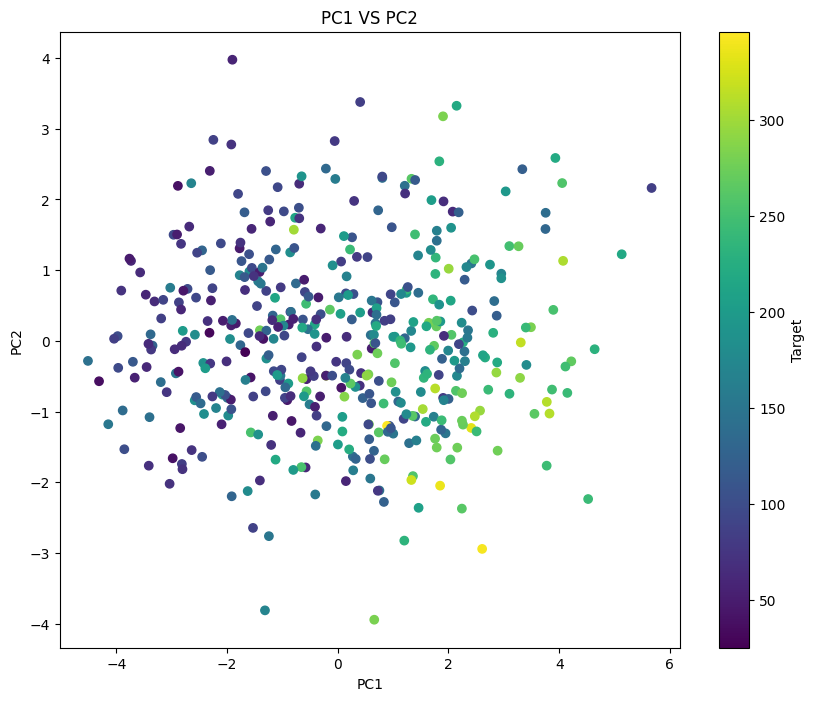

In [6]:
#import matplotlib
import matplotlib.pyplot as plt
# pca transform
x_pca = pca.transform(diabetes_df)
# plot pc1 & pc2
plt.figure(figsize=(10,8))
plt.scatter(x_pca[:,0],x_pca[:,1],cmap='viridis',c=target)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PC1 VS PC2")
plt.colorbar(label="Target")
plt.show()


در ابتدا بیماران از رنگ بنفش تیره تا زرد روشن دسته بندی شدن و هر چه به سمت زرد حرکت میکنه شدت بیماری بیشتر میشه 

اما این نمودار به نظر نمودار یکنواختی هست و خب نمی شه داده ها رو به شکل قابل توجهی از هم جدا کرد اما با همین حال میشه دید که افراد با شدت بیماری بالا تر بیشتر از 1 تا 6 مولفه اول تجمع داشتن و از دید مولفه دوم از 0 تا منفی 3 بیشتر حضور داشتن ولی افراد با میزان بیماری کمتر از -4 تا 0 مولفه اول و از -2 تا 3 مولفه دوم دیده میشن 
افرادی که در حالت میانی قرار دارن هم در کل نمودار پخش شدن و قابل مرز بندی نیستن  

# مزایا و معایب PCA 

مزایا : چون با ساختن مولفه ها مخصوصا مولفه اصلی به دنبال پیدا کردن بیشترین واریانس ممکن میگرده باعث میشه روی فیچر های مهم تر تمرکز داشته باشه و پر جزئیات ترین بعد ها رو انتخاب کنه این باعث میشه پیچیدگی مدل کمتر بشه و به همراهش چون کاهش ابعاد داشتیم هم سرعت محسبات بالا بره حالا این قضیه کجا خودش رو نشون میده ؟ موقع  کار با هزاران بعد 
از طرفی وقتی داره ابعاد کم اهمیت رو وزن کمتری بهشون میده خود به خود نویز ها و داده های پرت رو داره حذف میکنه 

معایب: از همین مسئله نویز بخوام شروع کنم گاهی به قول استاد شهامت همون انومالی ها یا اوت لیر ها هستن که هدف مسئله هستن مثلا پیدا کردن قد بلند ترین ادم ایران ! و ممکنه اینا به عنوان نویز یا داده پرت حذف بشن 
از طرفی این واریانس بالا شاید جزئیات بیشتری بده ولی ابعادی که واریانس کمتری داشتن ولی توشون یه سری اطلاعات ظریف بوده رو نادیده میگیره و این باعث میشه الگو های کوچیک یا خوشه های خاص دیده نشن 

در نهایت همه چیز نسبیه باید با توجه به اینکه نیاز مسئله چی بوده و تمرکز روی چه نوع داده هایی هست تصمیم گرفت پی سی ای خوب براش یا نه ؟ 

# question 4 Labeled Faces in the Wild 

people name:
 ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
shape:
 (1288, 1850)
image shape:
 (1288, 50, 37)


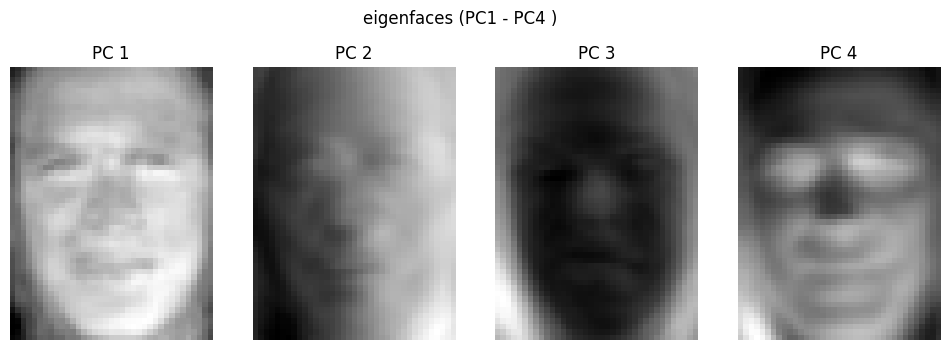

In [ ]:
# Labeled Faces in the Wild Dataset
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people
# import dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70,resize=0.4)
print('people name:\n',lfw_people.target_names)
print('shape:\n',lfw_people.data.shape)
print('image shape:\n',lfw_people.images.shape)
# pca 
pca = PCA(n_components=4)
pca.fit(lfw_people.data)
# eigenfaces
eigenfaces = pca.components_.reshape((4,50,37))
# plot faces
import matplotlib.pyplot as plt
fig , axes = plt.subplots(1,4,figsize=(12,4))
# show axes
for i in range(4):
    axes[i].imshow(eigenfaces[i],cmap='gray')
    axes[i].set_title(f"PC {i+1}")
    axes[i].axis('off')
plt.suptitle('eigenfaces (PC1 - PC4 )')
plt.show()

مولفه اول بیشتر چانه و زیر چشم و پیشانی روشنی داره تمرکز بیشتر روی سطح کلی صورت هست 
مولفه دوم به نظر میاد دنبال مرز صورت و پس زمینه بوده که البته کمی تاریکی توی نیمه صورت هم دیده میشه 
مولفه سوم اجزا کلی جزئی صورت رو مثل بینی حالت ابرو بالا و پایین لب ها مرز بندی شده 
مولفه سوم کاسه چشم فرم گونه و چانه فرم پیشانی و ... بیشتر مورد توجه قرار گرفته  

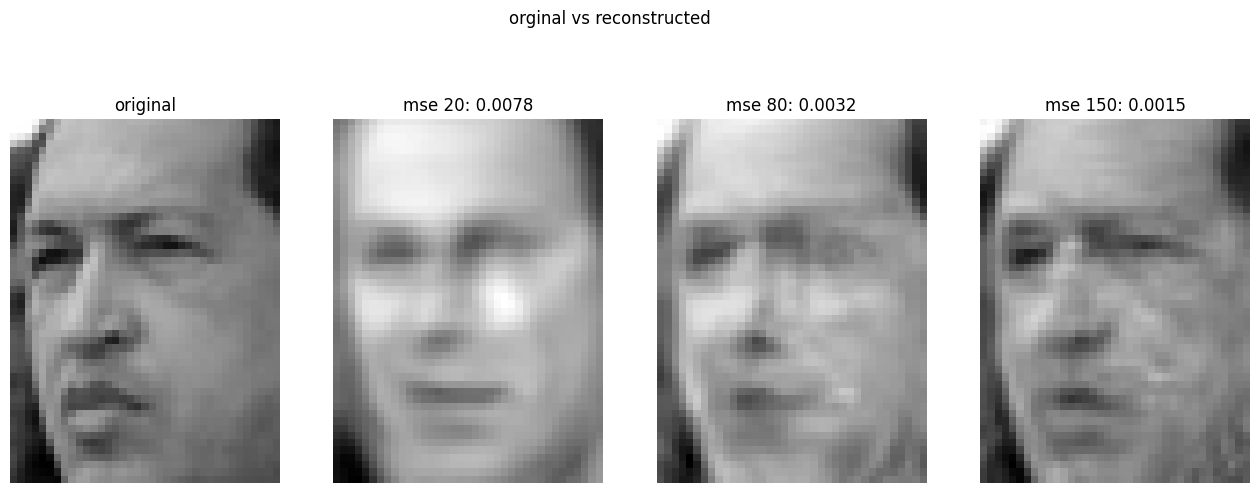

In [35]:
from sklearn.metrics import mean_squared_error

# choose someone from dataset
someone = lfw_people.data[0]
# person image
someone_image = lfw_people.images[0]
# pca with different components

def reconstruct_face(data, image, k):
    pca = PCA(n_components=k)
    pca.fit(data)

    weights = pca.transform([image])

    reconstructed = pca.inverse_transform(weights)
    
    mse = mean_squared_error(image, reconstructed.ravel())

    return reconstructed.reshape(50, 37), mse
k_20,mse_20 = reconstruct_face(lfw_people.data, someone, 20)
k_80,mse_80 = reconstruct_face(lfw_people.data, someone, 80)
k_150,mse_150 = reconstruct_face(lfw_people.data, someone, 150)

fig, axes = plt.subplots(1,4,figsize=(16,6))
axes[0].imshow(someone_image,cmap='gray')
axes[0].set_title("original")
axes[0].axis('off')

axes[1].imshow(k_20,cmap='gray')
axes[1].set_title(f'mse 20: {mse_20:.4f}')
axes[1].axis('off')

axes[2].imshow(k_80,cmap='gray')
axes[2].set_title(f'mse 80: {mse_80:.4f}')
axes[2].axis('off')

axes[3].imshow(k_150,cmap='gray')
axes[3].set_title(f'mse 150: {mse_150:.4f}')
axes[3].axis('off')
plt.suptitle('orginal vs reconstructed')
plt.show()

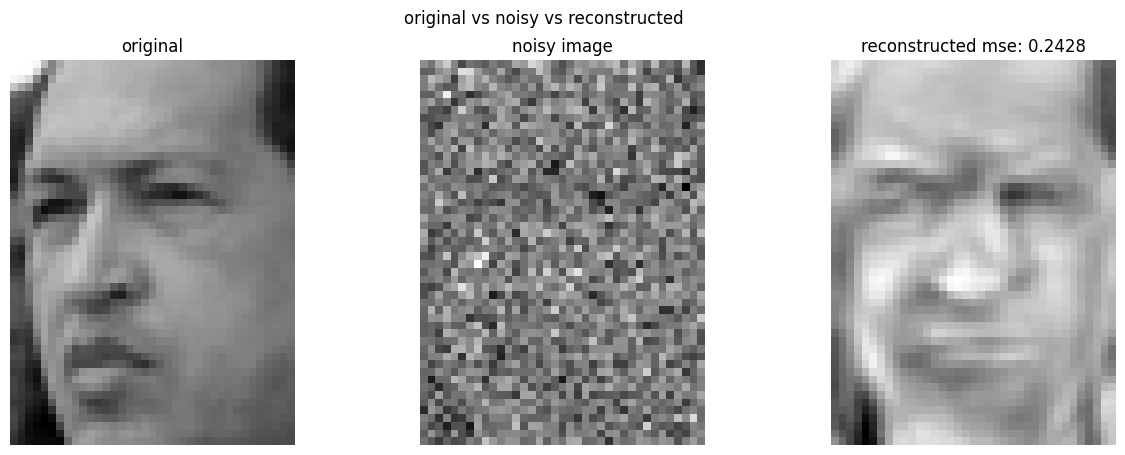

In [43]:
import numpy as np  
# extrac mr new datas
mr_new = lfw_people.data[0]
mr_new_img = lfw_people.images[0]
# create noise and add to mr_new datas 
noise =  np.random.normal(0,0.5,mr_new.shape)
noisy = mr_new + noise
noisy_img = noisy.reshape(50,37)

# reconstruct face
reconstructed_noisy_img,mse = reconstruct_face(lfw_people.data, noisy, 80)

# ploting 

fig, axes = plt.subplots(1,3,figsize = (15,5))

axes[0].imshow(mr_new_img,cmap='gray')
axes[0].set_title("original")
axes[0].axis('off')

axes[1].imshow(noisy_img,cmap='gray')
axes[1].set_title('noisy image')
axes[1].axis('off')

axes[2].imshow(reconstructed_noisy_img,cmap='gray')
axes[2].set_title(f'reconstructed mse: {mse:.4f}')
axes[2].axis('off')

plt.suptitle('original vs noisy vs reconstructed')
plt.show()

علتش اینه که ساختار چهره تو تمام تصاویر این دیتا ست تکرار شده این باعث میشه واریانس بیشتری داشته باشه و در نهایت باعث این شده که وقتی مولفه اصلی جدامیشه چهره تا حد قابل قبولی به شکل اول نزدیک بشه ولی نویز پراکنده هست و واریانس کمی داره برای همین نا دیده گرفته میشه توسط پی سی ای و این نشون میده فیچر های اصلی 1 تا 80 تونستن تا حد قابل قبولی اجرای مهم چهره رو تشخیص بدن چون نویز های تصادفی که بهشون اضافه شدن تو هر پیکسل مقدار متفاوتی داشته و خب پی سی ای هم وقتی دیده هم انحراف معیار خوبی ندارن هم الگو خاصی ندارن حذفشون کرده  


گذشته از اینا اگر تعداد مولفه های خیلی کمی انتخاب کنیم ممکنه چون مغز خودمون توانایی پیدا کردن الگو چهره خیلی قوی داره دچار توهم بشیم که این  عکس به اندازه کافی گویا نیست و ممکنه با نادیده گرفتن چین و چروک صورت و برخی جزئیات افراد شبیه به هم رو تشخیص غلط بده و هر چی تعداد فیچر کمتر بشه این مسئله بیشتر میشه 
حالا مسئله دیگه ای که هست اینه که به دیتاستی که روش اموزش دیده وابستگی داره ! ینی شاید اینجا عکسای این دیتا ست رو خیلی خوب بازسازی کنه و مولفه های خوبش رو بکشه بیرون ولی از این فضا که خارج شد ممکنه کاهش دقت پیدا کنه و خب مثل همین مثال نویز یا حالت نورپردازی متفاوت یا حالت مختلف چهره هم میتونه براش چالش ایجاد کنه تو تشخیص 